In [86]:
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import math
from sklearn.cluster import SpectralClustering

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
mat_contents = sio.loadmat('polblogs_processed.mat')

In [3]:
sorted(mat_contents.keys())

['A', '__globals__', '__header__', '__version__', 'true_labels']

In [4]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Mar 10 11:02:38 2020',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'true_labels': array([[0, 0, 0, ..., 1, 1, 1]], dtype=uint8)}

## Q1

In [11]:
mat_contents['true_labels'].shape, mat_contents['A'].shape

((1, 1490), (1490, 1490))

In [42]:
df = pd.DataFrame(data=mat_contents['A'])

In [43]:
G = nx.from_pandas_adjacency(df)

In [46]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1490
Number of edges: 9520
Average degree:  12.7785


## Q2

In [51]:
N = len(G.nodes)

In [74]:
k = []
logk = []
pk = []
logpk = []
for i in range(1489):
    x = G.degree[i]
    k.append(x)
    pk.append(x/N)

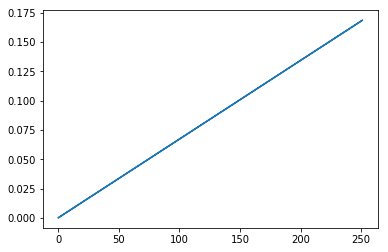

In [66]:
plt.plot(k,pk)

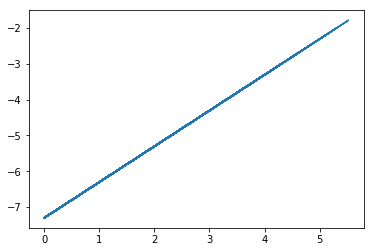

In [76]:
plt.plot(np.log(k),np.log(pk))

## Q3

In [78]:
d = 12.7785
p = d/(N-1)

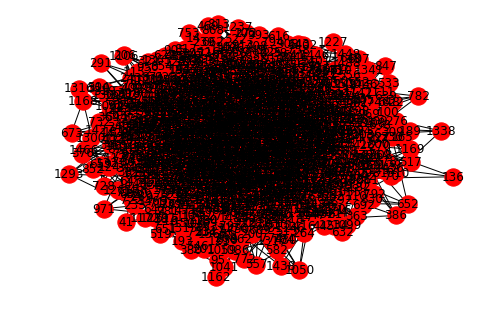

In [80]:
G = nx.erdos_renyi_graph(N,p) 
nx.draw(G, with_labels=True) 
plt.show() 

## Q4

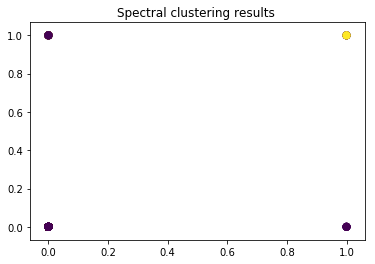

In [94]:
X = mat_contents['A']
clusters = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
y_pred = clusters.labels_
plt.title(f'Spectral clustering results ')
plt.scatter(X[:, 0], X[:, 1], s=50, c = y_pred);